<a href="https://colab.research.google.com/github/rguille3/PhysicsI_Labs/blob/main/Ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 3

Raul Guillen

9 Nov 2024

#  <font color='Red'> **Import Necessary Modules** </font>

In [568]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange, array, zeros
from numpy.linalg import norm

np.set_printoptions(precision=4, linewidth=200, threshold=2000, suppress=True)

π =  np.pi

###  <font color='Green'> Necessary Defintions. </font>

In [569]:
###
def rotation_xy(θ):
    """
    GIVEN: θ (in degrees)
    GET: rotation matrix
    """
    θ *= np.pi/180
    return np.array([ [np.cos(θ), -np.sin(θ), 0.], [np.sin(θ), np.cos(θ), 0.], [0., 0., 1.]])

def projection(basis, f_in):
    f_1 = np.dot( basis[0], f_in ) * basis[0]
    f_2 = np.dot( basis[1], f_in ) * basis[1]
    f_3 = np.dot( basis[2], f_in ) * basis[2]
    return [f_1, f_2, f_3]

def Ramp(θ, μS, μK, f_in):

    basis = (rotation_xy(θ) @ np.eye(3)).T

    f_fric, f_normal, f_z = projection(basis, -f_in)

    if np.linalg.norm(f_fric) <= np.linalg.norm( μS * f_normal ):
        None
    if np.linalg.norm(f_fric) > np.linalg.norm( μS * f_normal ):
        f_fric = np.linalg.norm(μK * f_normal) * f_fric / np.linalg.norm(f_fric)

    return f_normal + f_fric + f_z

#  <font color='Red'> **Experiment 1: Familiarization with Definitions.** </font>

###  <font color='Red'> The Rotation Matrix, print the rotation matrix for 3 angles of your choosing (note the defintion requires the angle in degrees). </font>

In [570]:
print( rotation_xy(2) )
print( rotation_xy(20) )
print( rotation_xy(87) )

[[ 0.9994 -0.0349  0.    ]
 [ 0.0349  0.9994  0.    ]
 [ 0.      0.      1.    ]]
[[ 0.9397 -0.342   0.    ]
 [ 0.342   0.9397  0.    ]
 [ 0.      0.      1.    ]]
[[ 0.0523 -0.9986  0.    ]
 [ 0.9986  0.0523  0.    ]
 [ 0.      0.      1.    ]]


###  <font color='Red'> Choose a rotation matrix from above, to rotate the usual Cartesian Basis (i.e. (Rotation_Matrix @ np.eye(3)).T ) and print the result. </font>

In [571]:
basis = (rotation_xy(45) @ np.eye(3)).T
print( basis )

[[ 0.7071  0.7071  0.    ]
 [-0.7071  0.7071  0.    ]
 [ 0.      0.      1.    ]]


###  <font color='Red'> Define an arbitrary acting force vector (3 component vector). </font>

In [572]:
f_in  = array([0, -9.8 , 0.])
print(f_in)

[ 0.  -9.8  0. ]


###  <font color='Red'> Use Newton's 3rd Law to get a Reacting force  </font>

In [573]:
f_react = -f_in
print(f_react)

[-0.   9.8 -0. ]


###  <font color='Red'> Project an arbitrary force vector, i.e. decompose into 3 vectors, e.g. f_in, on the new basis defined above. </font>

In [574]:
f_fric, f_normal, f_z = projection(basis, f_react)

###  <font color='Red'> Filter the frictional-projection. 1st, define the static friction coefficient (μS) and then the kinetic friction coefficient (μK). 2nd, define two if-statements to determine if friction component of the force above should be the static XOR kinetic one. </font>

In [575]:
μS = 0.2
μK = 0.1

if norm(f_fric) <= norm( μS * f_normal ): ## f_2
    None
if norm(f_fric) > norm( μS * f_normal ):
    f_2 = norm(μK * f_normal) * f_fric

###  <font color='Red'> Now determine the total force: f_in = -f_out $\rightarrow$ f_in + f_out = f_net. e.g. in the static limit f_net = 0. Print this net force. </font>

In [576]:
net_force = f_fric + f_normal + f_z + f_in

print("Net Force is %4.3f N" %(norm(net_force) ) )

Net Force is 0.000 N


###  <font color='Red'> Now use: Ramp(θ, μS, μK, f_in), to get the reactive force (f_out), with your choice of angle (θ), static friction coefficient (μS), kinetic friction coefficient (μK), and the f_in you defined above.

### Add this to f_in, do the results match from above? </font>

At first glance, by adjusting the coefficient values and ramp angles, it becomes clear that up to a certain point determined by the reactive force of static friction, the net force remains zero. As the angle increases, the gravitational force has a greater effect on the object, because as the sine function approaches 90 degrees, gravitational force will get closer to the gravitational constant.
Once the gravitational force acting on the object on the ramp exceeds the maximum limit of static friction, the object begins to accelerate, and the static friction coefficient transitions to the kinetic friction coefficient.

In [577]:
print("Net Force is %4.3f N" %( norm( Ramp(45, μS, μK, f_in) + f_in ) ) )

Net Force is 6.237 N


#  <font color='Red'> **Experiment 2: Varying Angle.** </font>

###  <font color='Red'> Define the range of angles you wish to test (using arange). </font>

In [578]:
θs = arange(0,90,0.1) ## range of angles you wish to test

###  <font color='Red'> Define a for-loop over these values. And get the force-magnitude for every value in the angle array defined above. Fix the value of the static friction, set kinetic friction to 0. Free feel to use the Ramp method. </font>

In [579]:
f  = zeros(len(θs)) ## create an empty array to fill-in later of length θs
for i in range(len(θs)): ## for-loop over all configurations, e.g. array θs
    f[i] = norm( Ramp(θs[i], 1.0, 0.0, f_in) + f_in ) ## compute the net-force given the i-th θs configuration

###  <font color='Red'> Plot your Results, make sure to leave a caption describing the physics of the graph. </font>

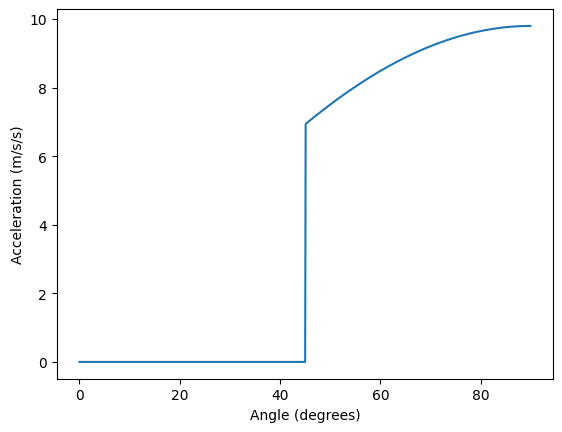

In [580]:
plt.plot(θs, f)
plt.xlabel("Angle (degrees)")
plt.ylabel("Acceleration (m/s/s)")
plt.show()

The graph above shows an object on a ramp as its slope or angle increases.

n this experiment, the x-axis represents the angle in degrees, which is the independent variable. The y-axis is used to plot the corresponding acceleration values.

The static friction coefficient is 1, and gravity is the only active force acting on the object. For simplicity, the kinetic friction coefficient is 0. The graph indicates that after approximately 45 degrees, the gravitational force eventually overcomes the static friction force, causing a significant increase in acceleration until it reaches the gravitational constant.

Once the gravitational force acting on the object on the ramp exceeds the maximum limit of static friction, the object begins to accelerate to the limit of 9.8 m/s/s(g).


#  <font color='Red'> **Experiment 3: Varying Static Friction Coefficient.** </font>

###  <font color='Red'> Define the range of static-friction-coefficients you wish to test (using arange). </font>

In [581]:
μs = arange(0,5,0.1) ## range of static friction coefficients you wish to test

###  <font color='Red'> Define a for-loop over these values. And get the force-magnitude for every value in the static-friction-coefficient array defined above. Fix the value of the angle, and set kinetic friction to 0. Free feel to use the Ramp method. </font>

In [582]:
f  = zeros(len(μs)) ## create an empty array to fill-in later of length μs
for i in range(len(μs)): ## for-loop over all configurations, e.g. array μs
    f[i] = norm( Ramp(45, μs[i], 0.0, f_in) + f_in ) ## compute the net-force given the i-th μs configuration

###  <font color='Red'> Plot your Results, make sure to leave a caption describing the physics of the graph. </font>

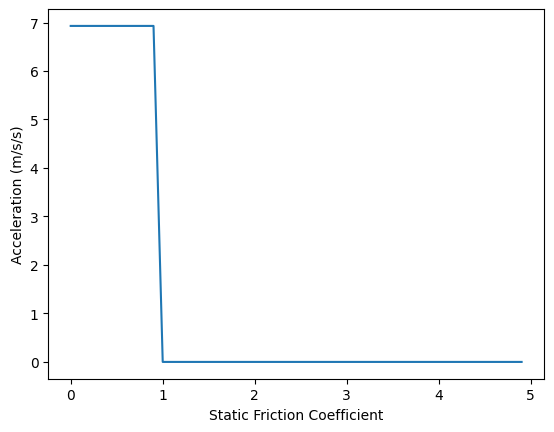

In [583]:
plt.plot(μs, f)
plt.xlabel("Static Friction Coefficient")
plt.ylabel("Acceleration (m/s/s)")
plt.show()

The graph above illustrates how acceleration changes as we increase the static friction coefficient on a 45-degree ramp. For each point on the x-axis, a gravitational force is applied to an item initially at rest on the ramp, and we plot its immediate acceleration after the net force acts on it. Here, only gravitational force drives the object downward, while friction opposes this motion as a reactive force. There is no kinetic friction, meaning frictional force only acts when the object is stationary, not when it's moving.

When the static friction coefficient reaches 1.0, the object stops accelerating when the force is applied because the friction force has reached a point where it fully opposes the gravitational pull. A higher static friction coefficient increases the maximum frictional force, as the frictional force depends on both this coefficient and the normal force.

One last note: the reason the acceleration is not 9.8 m/s² as the object is not in freefall. So to account for the magnitude of the gravitational force we need to account for the angle of the ramp, F_g*sin(45), when getting the net force.


#  <font color='Red'> **Experiment 4: Kinetic Friction and Dynamics.** </font>

###  <font color='Red'> Lets consider kinematics as discussed before, using the familiar Velocity-Verlet algorithm. </font>

###  <font color='Red'> Define the following 9 variables (similar to lab 2):
*   Time Resolution (dt)
*   Time-array
*   Mass of your particle
*   Initial Position (x0)
*   Initial Velocity set to zeros (v0 = np.zeros(3))
*   Initial Acceleration set to zeros (v0 = np.zeros(3))
*   Angle (θ)
*   Static Friction Coefficient (μs)
*   Static Friction Coefficient (μk)
 </font>

In [584]:
θ  = 60   ## initial angle
μs = 1.30 ## static-friction coefficient
μk = 1.8  ## kinetic-friction coefficient

dt = 0.1 ## s  : detector/sim time resolution
mass = 2 ## kg : mass of particle
g = 10   ## m/s/s
x0 = array([0.,  10. , 0.]) ## m  : initial position
v0 = array([ 0.,  0. , 0.]) ## m/s: initial velocity
a0 = array([ 0., -1., 0.]) * mass * g ## m/s/s: initial acceleration

time = arange(0, 3, dt) ## s : time array (array containing all moments in time)

###  <font color='Red'> Define an acting force on this particle acting for all times, e.g. the force of gravity (it can be any force), i.e. f_t a 2D array, the same shape of the force defined in lab 2.  </font>

In [585]:
f_t_act = zeros((len(time), 3 )) ## empty force-trajectory array
f_t_act[:,1] = -1. * mass * g  ## fill-in all 1-axis ('y'-axis) entries to -mg.

###  <font color='Red'> Define your Velocity Verlet, but with the new Force acting-reacting force term! To get the trajectory (for position, velocity, and acceleration)  </font>

In [586]:
x_t = zeros((len(time), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
v_t = zeros((len(time), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
a_t = zeros((len(time), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

x_t[0] = x0 ## initialize the 0th position-trajectory entry to the initial-position
v_t[0] = v0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
a_t[0] = (Ramp(θ, μs, μk, f_t_act[0]) + f_t_act[0] )/mass

for t in range(1,len(time)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
    x_t[t] = x_t[t-1] + v_t[t-1] * dt + a_t[t-1] * dt*dt/2 ## Velocity-Verlet Step 1 : find new position from old data
    a_t[t] = (Ramp(θ, μs, μk, f_t_act[t]) + f_t_act[t] )/mass ## compute new acceleration from the net-force
    v_t[t] = v_t[t-1] + (a_t[t-1] + a_t[t]) * dt/2 ## compute new velocity

###  <font color='Red'> Plot your Results, make sure to leave a caption describing the physics of the graph. </font>

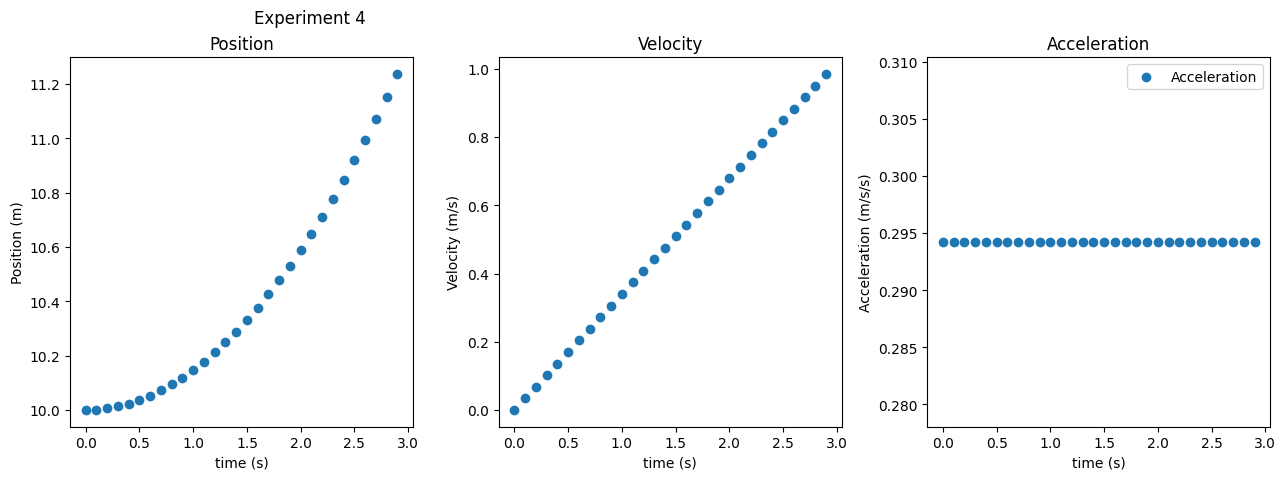

In [587]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment 4')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(time, x_t[:,1])
ax1.set_title("Position")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

#ax2.scatter(time, v_t[:,1])
ax2.scatter(time, norm(v_t, axis=1))
ax2.set_title("Velocity")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')

ax3.scatter(time, a_t[:,1], label="Acceleration")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='Acceleration (m/s/s)')

fig.show()

#  <font color='Red'> **Conclusion:** </font>

###  <font color='Red'> Write your Conclusion here, you may type in word-processor, only to copy-n-paste it here. This .ipynb file is your lab report. </font>

###  <font color='Red'> Demonstrate you understand this lab, this is the most imporant part of the lab report worth half of the total points. </font>


###  <font color='Red'> If your surface is completely parallel to the gravity-vector $\mathbf{g}$ (i.e. angle is 90 degrees from horizontal surface), can static friction support the object on this surface? </font>

If the surface is fully parallel to the gravity vector (i.e., at a 90-degree angle from the horizontal), static friction cannot support the object. At this angle, the surface is vertical, so there is no normal force to produce static friction. With gravity acting directly downward and no normal force present, static friction cannot oppose gravity. As a result, the object won’t stay in place and will fall freely due to gravity.

###  <font color='Red'> Is there an angle, such that no motion occurs with a static friction coefficient of 0.0? </font>

No, if the static friction coefficient is 0.0, there isn’t any angle where the object would stay in place. Static friction is what prevents an object from moving initially. With a coefficient of 0.0, there’s no static friction to resist any force, so even the slightest angle will cause the object to move under the influence of gravity.

This is assuming an angle off the perpendicular to the direction of gravity. With a static friction coefficient of 0.0, there would be no friction to resist any force, and even the smallest angle would cause the object to move due to gravity.